In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import *
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.cross_validation import StratifiedKFold, LeaveOneOut

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV


In [409]:
dataframe = pd.read_csv('Data/Social_Network_Ads.csv')

In [410]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [411]:
dataframe.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

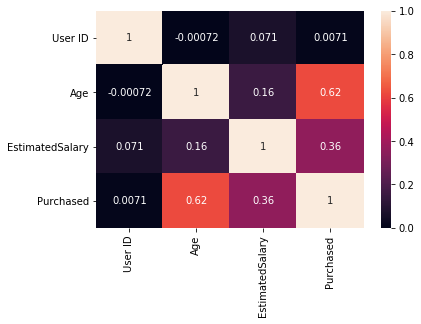

In [412]:
sns.heatmap(dataframe.corr(),annot=True)

In [413]:
dataframe = dataframe.drop(['User ID'],axis=1)

In [414]:
dataframe.sample()

,Gender,Age,EstimatedSalary,Purchased
251,Male,37,52000,0


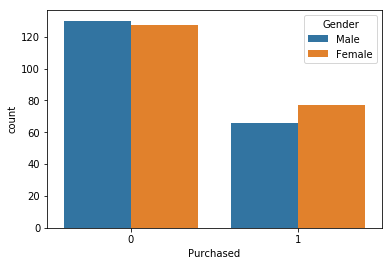

In [415]:
sns.countplot('Purchased',hue='Gender',data=dataframe)

/home/admin1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x720 with 0 Axes>

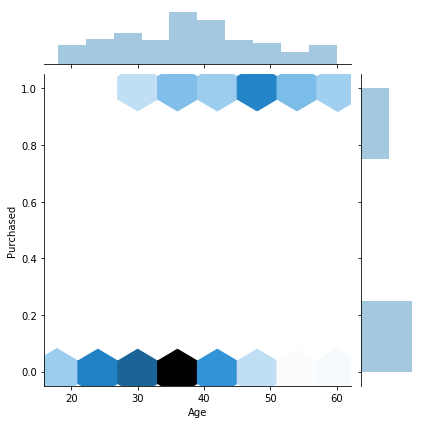

In [416]:
plt.figure(figsize=(20,10))
sns.jointplot('Age','Purchased',kind='hex',data=dataframe)

/home/admin1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


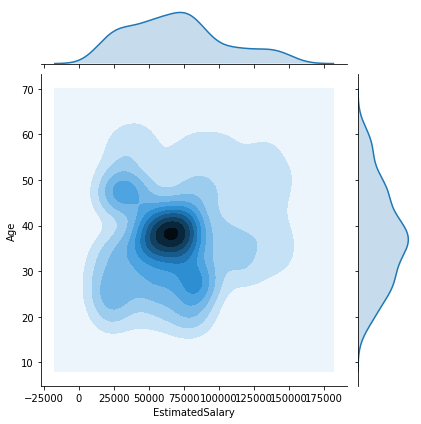

In [417]:
sns.jointplot('EstimatedSalary','Age',kind='kde',data=dataframe)

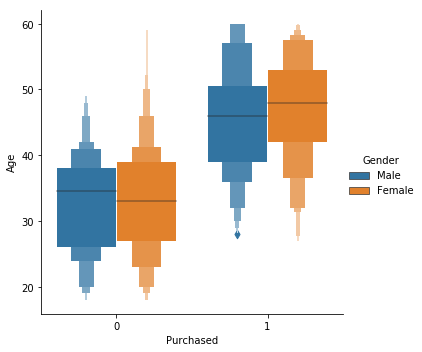

In [418]:
sns.catplot('Purchased','Age',hue='Gender',kind="boxen",data=dataframe)

<Figure size 1440x720 with 0 Axes>

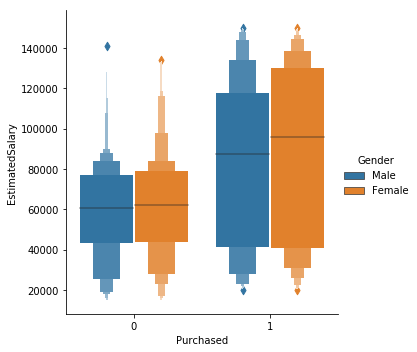

In [419]:
plt.figure(figsize=(20,10))
sns.catplot('Purchased','EstimatedSalary',hue='Gender',kind="boxen",data=dataframe)

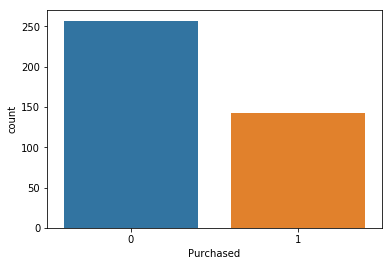

In [420]:
sns.countplot('Purchased',data=dataframe)

In [421]:
category = dataframe['Gender']

In [422]:
lb = LabelBinarizer()

In [423]:
Cat = lb.fit_transform(category)

In [424]:
dataframe['Gender'].nunique()

2

In [425]:
# one hot encoder for all the categorical
def one_Hot_Label_Binarize(cols,dataframe):
    filename = 'one_hot_encoder'
    file_format = 'pkl'
    for col in cols:
        n_col = dataframe[col].nunique()
        ll=LabelBinarizer()
        filename+=col
        if n_col>2 :
            ll.fit(dataframe[col])
            

In [426]:
dataframe['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [427]:
dataframe['Gender'] = Cat

In [428]:
dataframe.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [430]:
Y = dataframe['Purchased']

In [431]:
X = dataframe.drop(['Purchased'],axis=1)

In [446]:
kf = KFold(n_splits=10)

In [433]:
regressor = LogisticRegression()

In [434]:
# count=0
# for train,test in kf.split(X.values):
# #     print('i= {}\nj={}\n'.format(train,test))
#     print(count+=1)
#     X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]


In [435]:
# Checking accuracy on various models
scores = cross_val_score(X=X,y=Y,cv=kf,scoring='accuracy',n_jobs=-1,estimator=regressor)

In [436]:
print('The scores are: {}\n The accuracy using cross_val_score is : {}'.format(scores,np.mean(scores)*100))

The scores are: [0.65  0.85  0.9   0.9   0.95  0.525 0.4   0.425 0.475 0.25 ]
 The accuracy using cross_val_score is : 63.24999999999999


In [438]:
# plt.plot(np.arange(),np.sort(scores))

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [440]:
# Trying on Train_test_Split to see any diffrence in both types
reg2 = LogisticRegression(random_state=0)
reg2.fit(X_train,y_train)
ypred = reg2.predict(X_test)
print('Accuracy with train test split is :{}'.format(accuracy_score(y_test,ypred)))

Accuracy with train test split is :0.7875


In [441]:
def plot_learning_curve(estimator,X,Y,cv,n_jobs,scoring):
    test_size, train_error, valid_error = learning_curve(estimator=estimator,X=X,y=Y,cv=kf,n_jobs=n_jobs,scoring=scoring)
    train_error_means = -np.mean(train_error,axis=1)
    valid_error_means = -np.mean(valid_error,axis=1)
    title=str(estimator)+str(cv)
    plt.plot(test_size,train_error_means,color='r',label='training error')
    plt.plot(test_size,valid_error_means,color='g',label='validation error')
    plt.legend(loc='best')
    plt.xlabel('train_sizes')
    plt.ylabel('error values')
    plt.title(title)
    plt.figure(figsize=(10,10))
    plt.show()

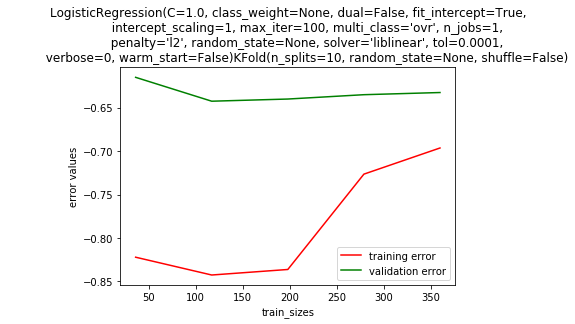

<Figure size 720x720 with 0 Axes>

In [447]:
plot_learning_curve(estimator=LogisticRegression(),X=X,Y=Y,cv=kf,n_jobs=5,scoring='accuracy')

# As we see training of the learning curve  

In [465]:
algos = [MLPClassifier(activation='logistic',hidden_layer_sizes=5,batch_size=80,shuffle=True),
        GradientBoostingClassifier(learning_rate=0.01,max_leaf_nodes=8,n_estimators=5,criterion='mse',min_samples_split=5),
         LogisticRegressionCV(Cs=2,refit=True,solver='liblinear',dual=False)
        ]

/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/admin1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

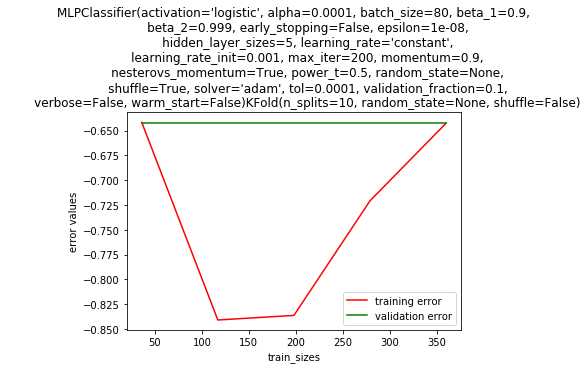

<Figure size 720x720 with 0 Axes>

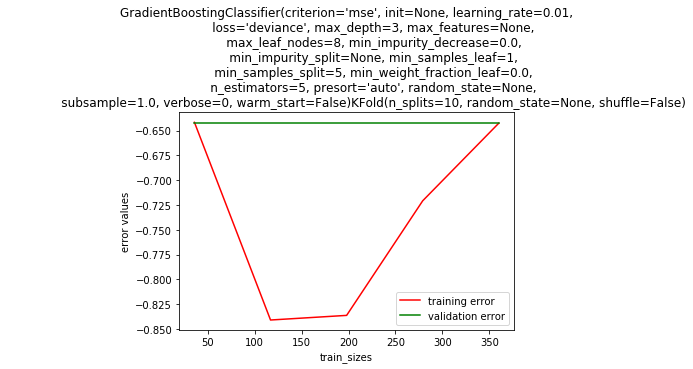

<Figure size 720x720 with 0 Axes>

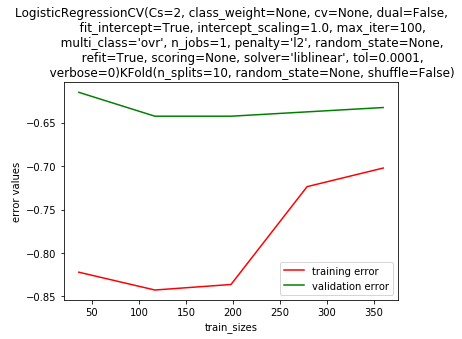

<Figure size 720x720 with 0 Axes>

In [466]:
for item in algos:
    plot_learning_curve(estimator=item,X=X,Y=Y,cv=kf,n_jobs=5,scoring='accuracy')